# Download (and save) seismic waveforms 

This notebook fetch seismic waveforms for different seismic events from the new database. It first looks at the available seismic stations for different events within a given radius, and then tries to download the waveforms for each events and save them in a given directory. Only the nearest seismic signal to each event is kept for this study.

In [1]:
from tqdm.notebook import tqdm

import catalog
import waveform

tqdm.pandas()
catalog.display_parameters()

## Load the database

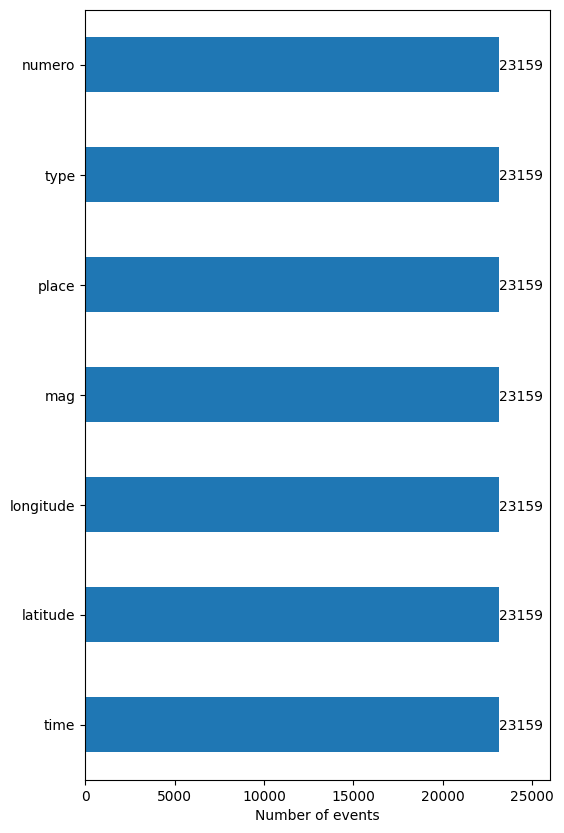

In [2]:
dataframe = catalog.load("data/new_database.pickle")

dataframe['numero'] = range(len(dataframe)) ## To have a better manipulation of the events

catalog.open_plot(dataframe, pos_number=0.05, xlim=26000)

## Fetch available stations for each event

Get the inventory of waveforms per avalanche for a radius = 2° and put it in a new column

In [ ]:
dataframe["inventory"] = dataframe.progress_apply( 
    lambda row: waveform.download_inventory(row, maxradius=2, retries=1), axis=1
)

dataframe.to_pickle("data/new_dataframe_with_inventory.pickle")

## Download and save the waveforms

This cell downloads the closest seismic signal of each event from the database.

In [ ]:
for event in tqdm(dataframe.itertuples(), total=len(dataframe)):
    #if event.Index == 0 : ## Uncomment this line to download a specific event
        stream = waveform.download_stream(event, time_margins=100, print_error=True, retries=1)
        if stream:
            stream.write(f"sismogrammes/{event.Index:03d}.pickle", format="PICKLE")

Sometimes errors occur and the data cannot be downloaded. Let's find the missing files and re-download the data :

In [ ]:
# dataframe = catalog.load("data/new_dataframe_with_inventory.pickle")

missing_files = waveform.missing_file(dataframe)

for event in tqdm(dataframe.itertuples(), total=len(dataframe)):
    if event.Index in missing_files:
        stream = waveform.download_stream(event, time_margins=100, print_error=True, retries=1)
        if stream:
            stream.write(f"sismogrammes/{event.Index:03d}.pickle", format="PICKLE")